In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


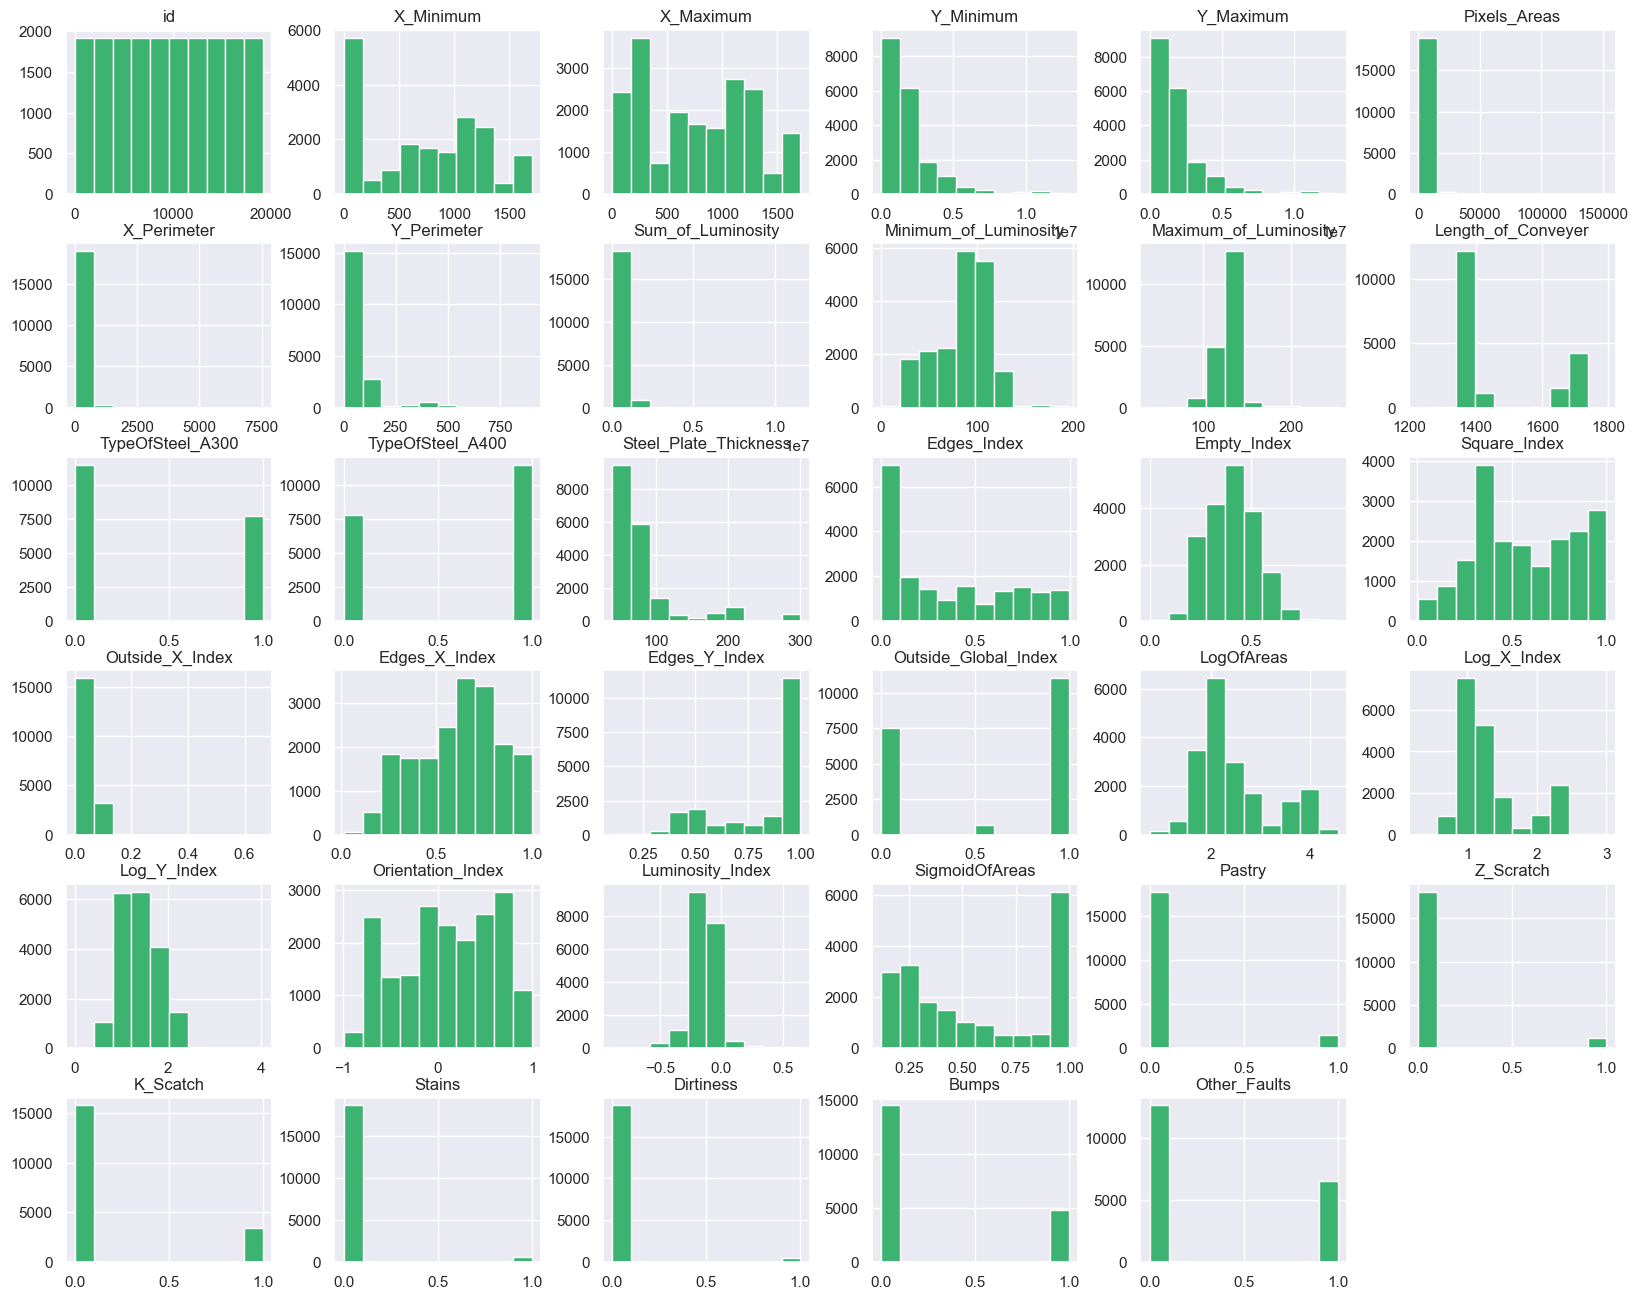

In [11]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='#3cb371');

In [12]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

# Preprocessing - Column Transformers

## Maximum Width and Height of the defect

X_maximum - X_minimum would return the maximum width of the defect

In [13]:
class SubtractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_subtract):
        self.columns_to_subtract = columns_to_subtract
    
    def fit(self, X, y=None):
        # No fitting necessary, so we return self
        return self
    
    def transform(self, X):
        # Make a copy of the input DataFrame to avoid modifying the original
        X_transformed = X.copy()
        # Perform subtraction for each pair of columns
        for cols in self.columns_to_subtract:
            col1, col2, new_col_name = cols
            X_transformed[new_col_name] = X_transformed[col2] - X_transformed[col1]
        # Drop the original columns
        X_transformed.drop(columns=[col1,col2], axis=1, inplace=True)
        return X_transformed



width_transformer = SubtractionTransformer([("X_Minimum", "X_Maximum", "Width")])
height_transformer = SubtractionTransformer([("Y_Minimum", "Y_Maximum", "Height")])

In [14]:
train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [15]:
train[(train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].sum(axis = 1) > 1)]

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
634,634,41,192,1682722,1682891,9927,578,343,1098162,29,...,0.0592,-0.1071,1.0000,0,0,1,0,0,0,1
752,752,39,194,2134009,2134076,10904,562,360,1130960,32,...,0.6522,-0.1031,0.4630,0,0,1,0,0,0,1
3572,3572,241,360,938265,938349,2027,178,118,241083,38,...,-0.5833,-0.3705,1.0000,0,0,1,0,0,1,0
4416,4416,39,729,498078,498335,13114,976,453,1438454,29,...,0.0442,-0.0960,1.0000,0,0,1,0,0,0,1
4530,4530,39,222,221142,2212144,10166,634,383,1130960,31,...,0.0145,-0.2199,1.0000,0,0,1,0,0,0,1
4664,4664,39,218,7430,7458,21321,758,441,2256472,22,...,-0.0263,-0.0573,1.0000,0,0,1,0,0,0,1
6448,6448,41,192,92878,92896,11211,572,357,1402972,31,...,0.1129,-0.0948,1.0000,0,0,1,0,0,0,1
7589,7589,41,776,844714,844903,11711,822,497,1351903,25,...,0.2064,-0.0971,1.0000,0,0,1,0,0,0,1
8075,8075,41,193,1725027,1725163,10941,639,409,1270726,40,...,0.0642,-0.1077,1.0000,0,0,1,0,0,0,1
8538,8538,39,215,1512277,1512467,13033,709,424,1508093,26,...,0.0393,-0.0966,1.0000,0,0,1,0,0,0,1


Having an estimator for all the targets might work

## Type Of Steel => Nominal to Ordinal

Since its a defect test, and A400 steel is stronger than A300 steel, Instead of treating it as a nominal class and one-hot encoding, storing only the A400 column, would result with: 0 if weak, 1 if strong basically.

Having less columns might help out with the training process.

In [16]:
class RenameColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, old_column, new_column):
        self.old_column = old_column
        self.new_column = new_column
    
    def fit(self, X, y=None):
        # No fitting necessary, so we return self
        return self
    
    def transform(self, X):
        # Make a copy of the input DataFrame to avoid modifying the original
        X_transformed = X.copy()
        # Rename the specified column
        X_transformed.rename(columns={self.old_column: self.new_column}, inplace=True)
        return X_transformed


class DropColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_be_dropped):
        self.columns_to_be_dropped = columns_to_be_dropped
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.drop(self.columns_to_be_dropped,axis = 1, inplace = True)
        return X_transformed


drop_A300 = DropColumnTransformer(["TypeOfSteel_A300"])
rename_A400 = RenameColumnTransformer("TypeOfSteel_A400","Is_A400")
# Fit and transform your data using the pipeline
rename_A400.fit_transform(train)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [17]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

## Target Columns

'Pastry', <br>
'Z_Scratch', <br>
'K_Scatch', <br>
'Stains',<br>
'Dirtiness', <br>
'Bumps', <br>
'Other_Faults'

## Drop target columns

In [18]:
drop_targets = DropColumnTransformer(['Pastry',
'Z_Scratch',
'K_Scatch',
'Stains',
'Dirtiness',
'Bumps',
'Other_Faults'])

In [19]:
drop_targets.fit_transform(train)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,584,590,909972,909977,16,8,5,2274,113,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


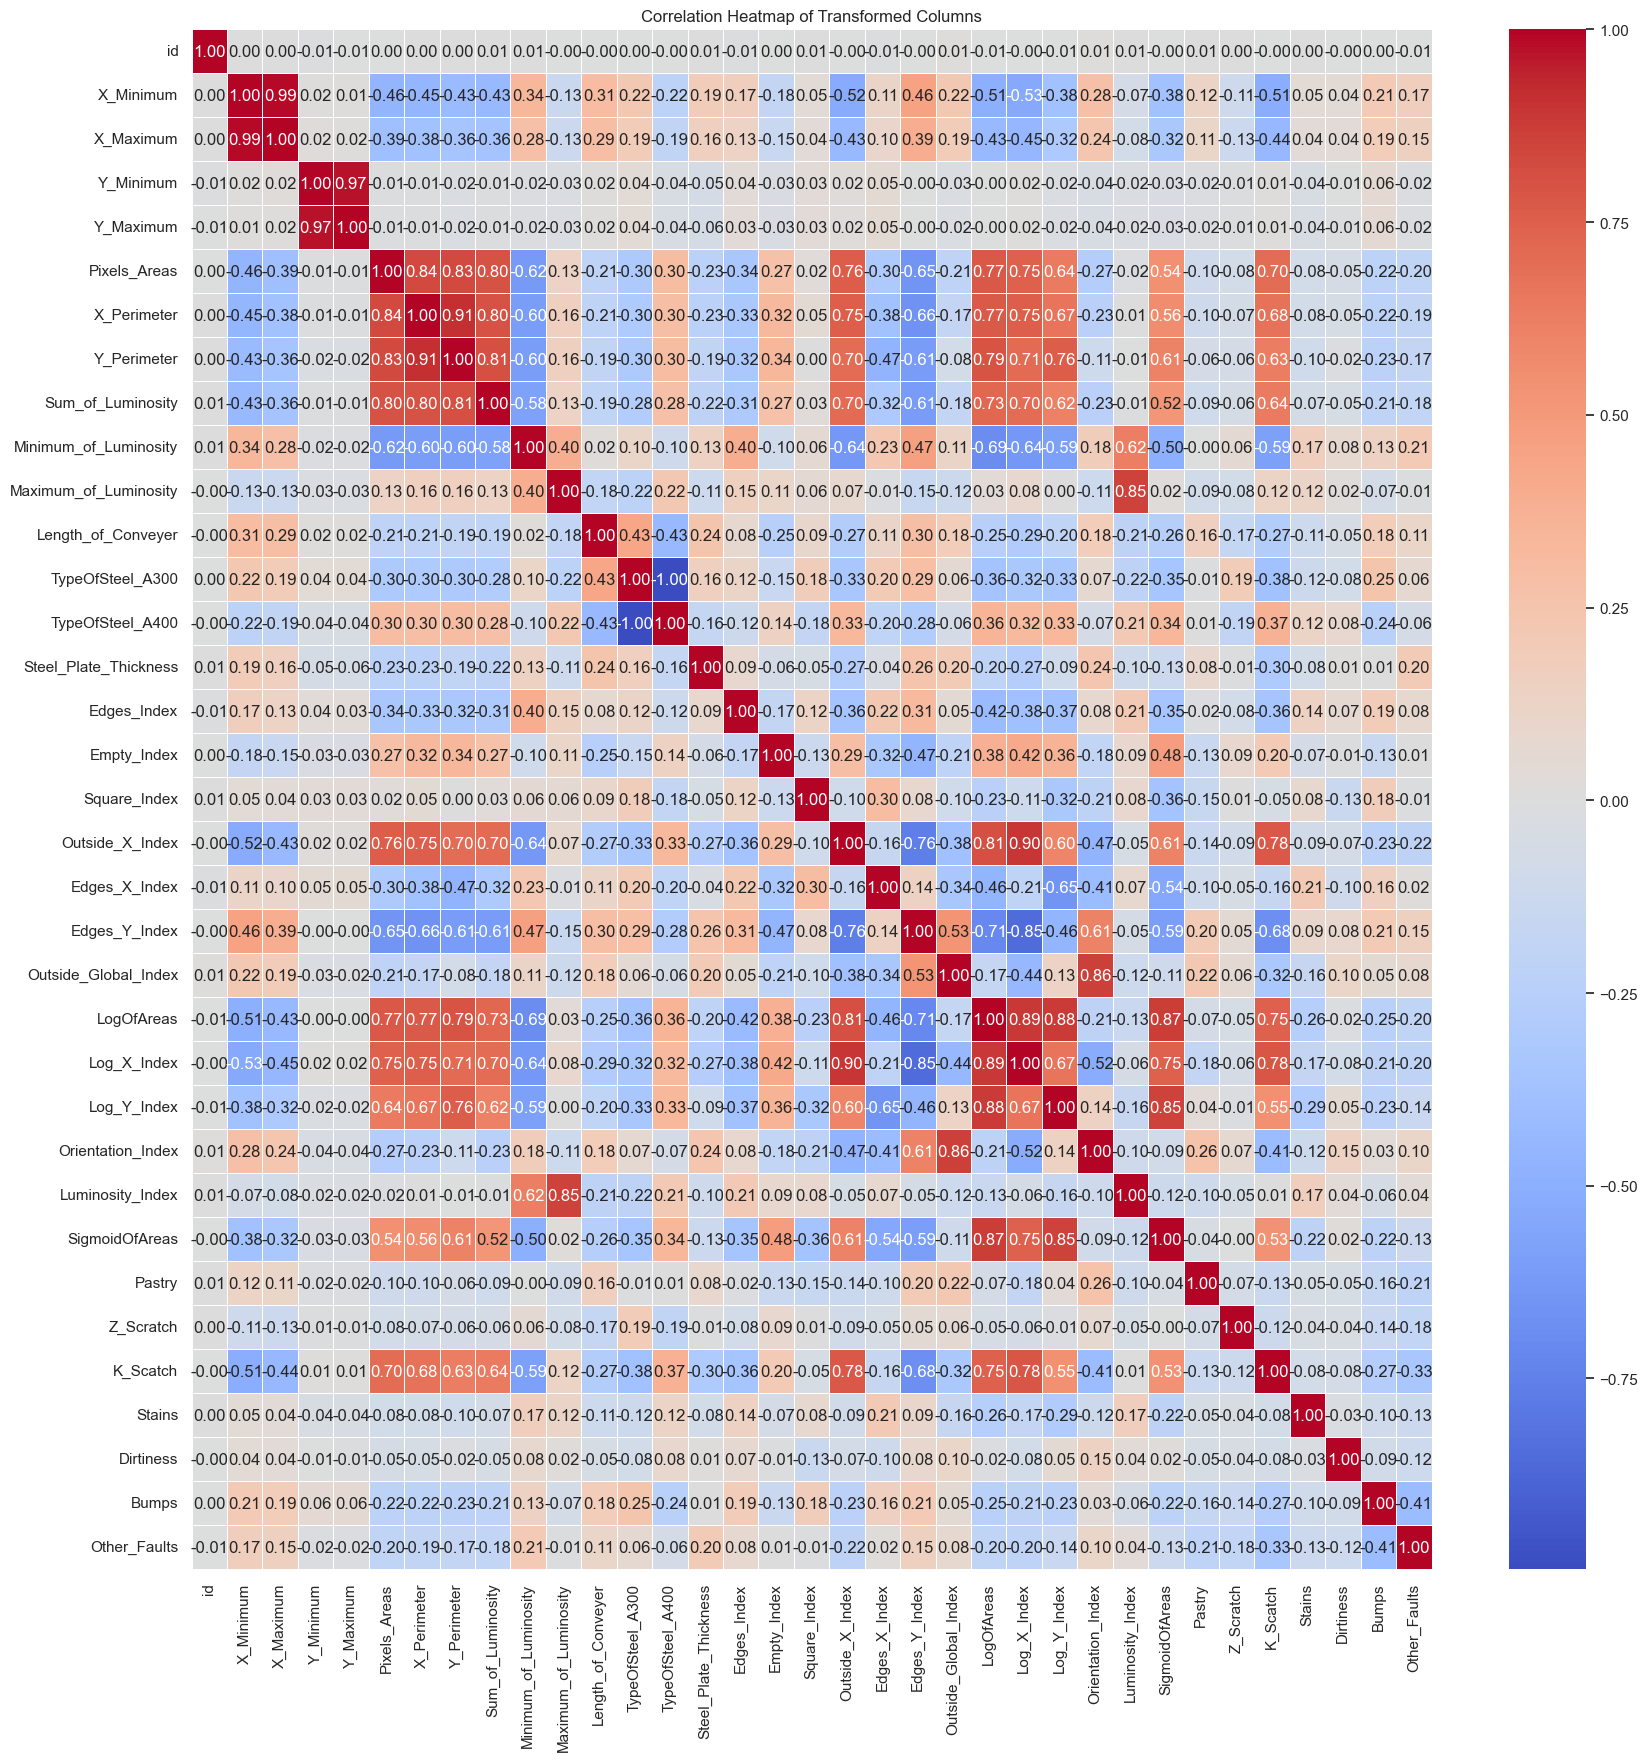

In [20]:
correlation_matrix = train.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Transformed Columns')
plt.show()

# Condendancy Problem

The area and the perimeters, have high correlation with Logs, since they are directly dependent to each other, I'm going to create two different pipelines, one keeping logarithmic ones and the other keeping the non-logarithmic ones and see how they result

In [21]:
logarithmic_dropper = DropColumnTransformer(["LogOfAreas","Log_X_Index","Log_Y_Index"])
non_logarithmic_dropper = DropColumnTransformer(["Pixels_Areas","X_Perimeter","Y_Perimeter"])

## PCA

Principal Component Analysis (PCA) is a technique used for dimensionality reduction and feature extraction.<br>
It aims to transform the original features into a new set of orthogonal (uncorrelated) features called principal components while retaining most of the variance in the data.

In [22]:
from sklearn.decomposition import PCA

In [23]:
numeric_df = train.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [24]:
standardized_df = (numeric_df - numeric_df.mean()) / numeric_df.std()

In [25]:
pca = PCA(n_components=3)  # Adjust the number of components as needed

In [26]:
pca.fit(standardized_df)

PCA(n_components=3)

In [27]:
transformed_df = pca.transform(standardized_df)

In [28]:
transformed_df = pd.DataFrame(transformed_df, columns=[f'PC{i+1}' for i in range(transformed_df.shape[1])])

In [29]:
transformed_df

,PC1,PC2,PC3
0,-2.261708,3.541234,0.839390
1,-1.215363,-3.652397,-0.333334
2,8.037191,0.109648,-0.201958
3,-1.386225,-0.216457,2.380142
4,-0.232592,-4.679013,1.648968
...,...,...,...
19214,-3.035664,3.420342,0.171393
19215,-2.105988,-0.788358,0.066291
19216,1.785000,-4.261055,0.303113
19217,-1.588718,-1.318595,-0.152533


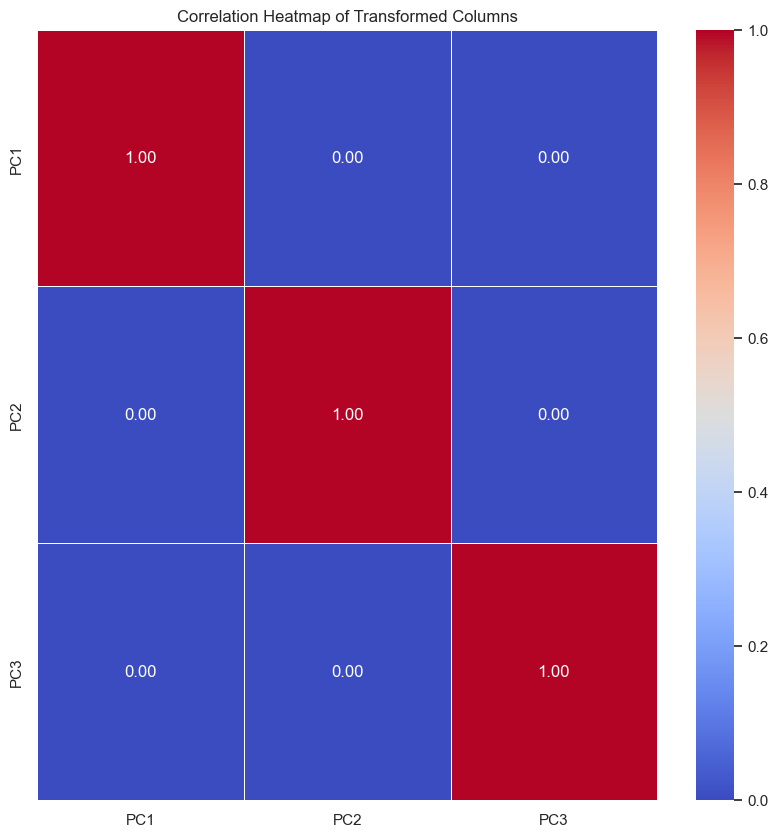

In [30]:
correlation_matrix = transformed_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Transformed Columns')
plt.show()

# Float64 converter for GPU use

In [31]:
class Float64Converter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.astype(np.float64)

# Final Pipelines

## PCA

In [32]:
from xgboost import XGBClassifier

In [33]:
import numpy as np

In [34]:
from sklearn.model_selection import learning_curve

In [35]:
from sklearn.base import clone

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("ROC AUC Score")
    estimator = clone(estimator)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training ROC AUC")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation ROC AUC")

    plt.legend(loc="best")
    plt.show()
    return estimator

In [37]:
xgbc = XGBClassifier(n_estimators = 10, device = "cuda", max_depth = 20, max_leaves =10, learning_rate = 0.25, reg_alpha = 0.1, reg_lambda = 0.3)
PCA_pipeline = Pipeline([
    ("Width Transformer", SubtractionTransformer([("X_Minimum", "X_Maximum", "Width")])),
    ("Height Transformer", SubtractionTransformer([("Y_Minimum", "Y_Maximum", "Height")])),
    ("Drop A300", DropColumnTransformer(["TypeOfSteel_A300"])),
    ("Drop ID", DropColumnTransformer(["id"])),
    ("Rename A400", RenameColumnTransformer("TypeOfSteel_A400","Is_A400")),
    ('Scaler', StandardScaler()),  # Optional: Standardize the features
    ('Principal Component Analysis', PCA(n_components = 15, svd_solver = "arpack")),  # PCA
    ("Float 64 converter",Float64Converter()),
])

In [38]:
PCA_pipeline

Pipeline(steps=[('Width Transformer',
                 SubtractionTransformer(columns_to_subtract=[('X_Minimum',
                                                              'X_Maximum',
                                                              'Width')])),
                ('Height Transformer',
                 SubtractionTransformer(columns_to_subtract=[('Y_Minimum',
                                                              'Y_Maximum',
                                                              'Height')])),
                ('Drop A300',
                 DropColumnTransformer(columns_to_be_dropped=['TypeOfSteel_A300'])),
                ('Drop ID',
                 DropColumnTransformer(columns_to_be_dropped=['id'])),
                ('Rename A400',
                 RenameColumnTransformer(new_column='Is_A400',
                                         old_column='TypeOfSteel_A400')),
                ('Scaler', StandardScaler()),
                ('Principal Component Analysis',
                 PCA(n_components=15, svd_solver='arpack')),
                ('Float 64 converter', Float64Converter())])

## Learning Phase

In [39]:
train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [40]:
X = train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
Y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [41]:
y1 = Y['Pastry'].astype("int32")
y2 = Y["Z_Scratch"].astype("int32")
y3 = Y["K_Scatch"].astype("int32")
y4 = Y["Stains"].astype("int32")
y5 = Y["Dirtiness"].astype("int32")
y6 = Y["Bumps"].astype("int32")
y7 = Y["Other_Faults"].astype("int32")

In [42]:
def plot_multiple_learning_curves(base_estimator_to_be_cloned, X, Y, ylim, cv, n_jobs, train_sizes):
    plt.figure(figsize=(20, 10))
    estimators = []

    for i, y in enumerate(Y, 1):
        plt.subplot(2, 4, i)
        plt.title(f'Estimator for y{i}')
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        
        # Clone the base estimator
        estimator_copy = clone(base_estimator_to_be_cloned)

        train_sizes, train_scores, test_scores = learning_curve(
            estimator_copy, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean,  color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean,  color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")

        # Fit the estimator on the current target variable (y)
        estimator_copy.fit(X, y)

        # Append the fitted estimator to the list
        estimators.append(estimator_copy)

    plt.tight_layout()
    plt.show()

    # Return the fitted estimators
    return tuple(estimators)

In [43]:
X = PCA_pipeline.fit_transform(X)

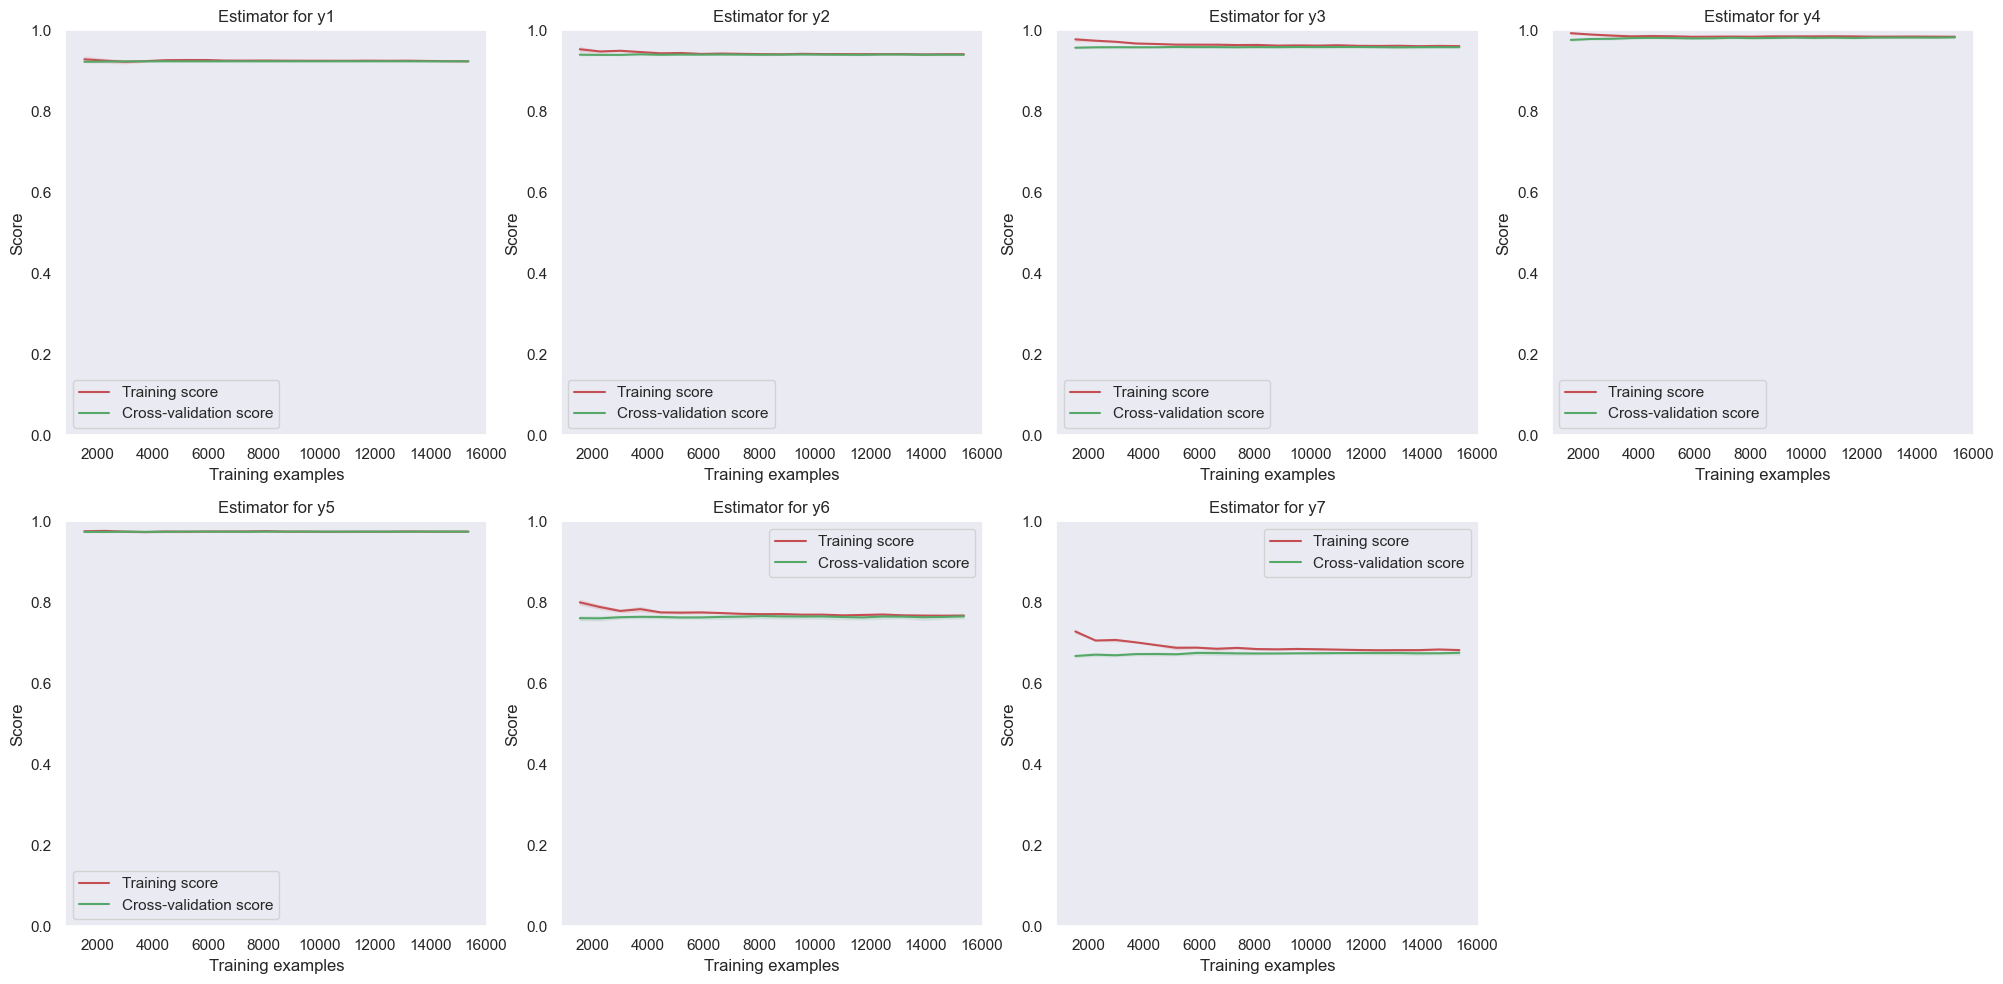

In [44]:
estimators = plot_multiple_learning_curves(xgbc, X = X, Y = [y1,y2,y3,y4,y5,y6,y7] , ylim = [0,1], cv = 5, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 20))

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
def predict_all(estimators, X):
    Y_pred = {
            "Pastry": estimators[0].predict_proba(X)[:, 1],
            "Z_Scratch": estimators[1].predict_proba(X)[:, 1],
            "K_Scatch": estimators[2].predict_proba(X)[:, 1],
            "Stains": estimators[3].predict_proba(X)[:, 1],
            "Dirtiness": estimators[4].predict_proba(X)[:, 1],
            "Bumps": estimators[5].predict_proba(X)[:, 1],
            "Other_Faults": estimators[6].predict_proba(X)[:, 1]
    }
    Y_pred = pd.DataFrame(Y_pred)
    return Y_pred

In [47]:
Y_pred = predict_all(estimators,X)

C:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:39:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [48]:
Y_pred

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.023292,0.017853,0.034784,0.739275,0.037010,0.140876,0.263932
1,0.194381,0.013157,0.023133,0.011248,0.030436,0.236648,0.362061
2,0.020625,0.015778,0.883257,0.011248,0.018102,0.022519,0.095414
3,0.115648,0.021975,0.057558,0.011409,0.106638,0.207590,0.387009
4,0.326483,0.021116,0.026654,0.011248,0.027802,0.137378,0.666814
...,...,...,...,...,...,...,...
19214,0.044539,0.041066,0.028513,0.176891,0.028178,0.288610,0.318284
19215,0.165466,0.022141,0.021943,0.011248,0.029070,0.306332,0.375905
19216,0.210294,0.084420,0.045858,0.011248,0.011906,0.187706,0.493663
19217,0.263291,0.067575,0.020978,0.011248,0.019581,0.193500,0.345434


In [49]:
Y

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,0,0,0,0,0,0,1
19216,1,0,0,0,0,0,0
19217,0,0,0,0,0,0,1


In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(Y,Y_pred)

0.8712868435108289

In [52]:
test = pd.read_csv("test.csv")

In [53]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [54]:
X_test = PCA_pipeline.transform(test)

In [55]:
submission = predict_all(estimators,X_test)

In [56]:
submission

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.344659,0.013870,0.026654,0.011248,0.019581,0.147380,0.402368
1,0.229464,0.040998,0.033910,0.011409,0.160088,0.159934,0.376595
2,0.013414,0.072789,0.075410,0.015703,0.019364,0.276804,0.388926
3,0.053500,0.018380,0.021943,0.012200,0.019581,0.473042,0.364315
4,0.017939,0.013157,0.027726,0.021409,0.021573,0.457442,0.416016
...,...,...,...,...,...,...,...
12809,0.135063,0.050786,0.034525,0.011409,0.033444,0.234072,0.335012
12810,0.125967,0.049367,0.034516,0.033592,0.129381,0.150398,0.391692
12811,0.020625,0.015778,0.837993,0.011248,0.017126,0.022519,0.122786
12812,0.243027,0.016245,0.041702,0.011409,0.053020,0.172545,0.338171


In [57]:
submission.insert(0, 'id', test["id"])

In [58]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.344659,0.013870,0.026654,0.011248,0.019581,0.147380,0.402368
1,19220,0.229464,0.040998,0.033910,0.011409,0.160088,0.159934,0.376595
2,19221,0.013414,0.072789,0.075410,0.015703,0.019364,0.276804,0.388926
3,19222,0.053500,0.018380,0.021943,0.012200,0.019581,0.473042,0.364315
4,19223,0.017939,0.013157,0.027726,0.021409,0.021573,0.457442,0.416016


In [59]:
submission.to_csv("submission.csv",index=False)

In [60]:
def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, ylim=[0,1], cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    estimator = clone(estimator)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Compute ROC AUC scores on the test set
    test_roc_auc_scores = []
    for train_size, train_score in zip(train_sizes, train_scores):
        estimator.fit(X_train[:int(train_size)], y_train[:int(train_size)])
        y_pred = estimator.predict_proba(X_test)  # Probabilities of positive class
        test_roc_auc = roc_auc_score(y_test, y_pred)
        test_roc_auc_scores.append(test_roc_auc)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)  # Compute std deviation of test scores
    test_roc_auc_scores_mean = np.mean(test_roc_auc_scores)  # Mean ROC AUC score

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test Accuracy")

    plt.plot(train_sizes, test_roc_auc_scores, 'o-', color="b",
             label="ROC AUC")

    plt.legend(loc="best")
    plt.show()
    return estimator

## Optuna

In [61]:
def auc_score(estimator, X, y):
    y_prob = estimator.predict_proba(X)
    return roc_auc_score(y, y_prob)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import optuna

C:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 400),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.7, log=True),
        'gamma': trial.suggest_float('gamma', 1e-3, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        "min_child_weight": trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, log=True),
    }

    score = cross_val_score(XGBClassifier(**params), X_train, Y_train , roc_auc_score, cv=5).mean()
    return score

#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=500, n_jobs = 6, gc_after_trial = True)
#best_params = study.best_params

In [64]:
xgb = XGBClassifier(n_estimators = 384, learning_rate = 0.026052022622994456, gamma = .24912897204076312, reg_alpha = .42923479670549775, reg_lambda = .44691569158475314, max_depth = 4, min_child_weight = 2, subsample = .54595622192569, colsample_bytree = .8690260901545567)

In [65]:
xgb.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8690260901545567, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.24912897204076312,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.026052022622994456,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=384, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
test = pd.read_csv("test.csv")
X_test = PCA_pipeline.fit_transform(test)

In [67]:
y_pred = xgb.predict_proba(X_test)

In [68]:
y_pred

array([[3.86641826e-03, 3.66326720e-02, 1.49710234e-02, ...,
        7.45363021e-03, 3.59064907e-01, 3.73972267e-01],
       [2.35378277e-03, 1.80286542e-01, 6.73908219e-02, ...,
        8.01624358e-03, 2.67067015e-01, 3.62882733e-01],
       [1.21568084e-01, 2.37423498e-02, 3.14869895e-03, ...,
        3.96025069e-02, 2.51218587e-01, 2.57149011e-01],
       ...,
       [9.23082326e-03, 7.40311225e-04, 7.72385895e-01, ...,
        2.30225036e-03, 5.73967583e-03, 1.11436121e-01],
       [2.48768786e-03, 1.35891467e-01, 6.08268380e-02, ...,
        1.91640556e-02, 1.60810366e-01, 3.04639637e-01],
       [2.95789866e-03, 1.38574385e-03, 6.28831506e-01, ...,
        3.63544095e-03, 6.35221694e-03, 2.61746168e-01]], dtype=float32)

In [69]:
submission = pd.DataFrame(y_pred)
submission.columns = ["Pastry",
            "Z_Scratch",
            "K_Scatch",
            "Stains",
            "Dirtiness",
            "Bumps",
            "Other_Faults"]

In [70]:
submission

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.003866,0.036633,0.014971,0.003963,0.007454,0.359065,0.373972
1,0.002354,0.180287,0.067391,0.018118,0.008016,0.267067,0.362883
2,0.121568,0.023742,0.003149,0.000509,0.039603,0.251219,0.257149
3,0.115896,0.002944,0.001372,0.001533,0.003911,0.622566,0.277657
4,0.044337,0.325071,0.000815,0.000506,0.002389,0.104042,0.519184
...,...,...,...,...,...,...,...
12809,0.001927,0.079881,0.019001,0.027568,0.007166,0.189383,0.366736
12810,0.050019,0.347574,0.012270,0.001197,0.032201,0.400776,0.318495
12811,0.009231,0.000740,0.772386,0.000442,0.002302,0.005740,0.111436
12812,0.002488,0.135891,0.060827,0.057059,0.019164,0.160810,0.304640


In [71]:
submission.insert(0, 'id', test["id"])

In [72]:
#submission.to_csv("submissi")

## XGB with softmax

In [73]:
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
xgbc = XGBClassifier(objective = "multi:softprob",booster = "gbtree", num_class = 7, n_estimators = 500, max_depth = 5, max_leaves =5, learning_rate = 0.2, reg_alpha = 0.15, reg_lambda = 0.15 )

In [75]:
def one_hot_to_label(one_hot_array):
    """
    Convert one-hot encoded labels to a single label.
    
    Args:
        one_hot_array (numpy.ndarray): Array of shape (num_examples, num_classes) with one-hot encoded labels.
        
    Returns:
        numpy.ndarray: Array of shape (num_examples,) with single labels.
    """
    return np.argmax(one_hot_array, axis=1).astype("int8")


In [76]:
train = pd.read_csv("train.csv")

In [77]:
X = train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
Y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [78]:
X = PCA_pipeline.fit_transform(X)

In [79]:
Y = one_hot_to_label(Y)

In [80]:
xgbc = XGBClassifier(objective = "multi:softprob",booster = "gbtree", num_class = 7, n_estimators = 500, max_depth = 5, max_leaves =5, learning_rate = 0.2, reg_alpha = 0.15, reg_lambda = 0.15 )

In [81]:
def label_to_one_hot(labels, num_classes):
    """
    Convert single labels to one-hot encoded labels.
    
    Args:
        labels (numpy.ndarray): Array of shape (num_examples,) with single labels.
        num_classes (int): Number of classes.
        
    Returns:
        numpy.ndarray: Array of shape (num_examples, num_classes) with one-hot encoded labels.
    """
    num_examples = len(labels)
    one_hot_labels = np.zeros((num_examples, num_classes))
    one_hot_labels[np.arange(num_examples), labels] = 1
    return one_hot_labels

In [82]:
def auc_score(estimator, X, y):
    y_prob = estimator.predict_proba(X)
    y = label_to_one_hot(y,7)
    return roc_auc_score(y, y_prob)

In [83]:
from optuna.samplers import TPESampler

In [84]:
def objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
    }

    score = cross_val_score(xgbc.set_params(**params), X ,Y, scoring=auc_score, cv=5, n_jobs = 12).mean()
    return score


In [85]:
train = pd.read_csv("train.csv")

In [86]:
X = train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
Y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [87]:
PCA_pipeline = Pipeline([
    ("Width Transformer", SubtractionTransformer([("X_Minimum", "X_Maximum", "Width")])),
    ("Height Transformer", SubtractionTransformer([("Y_Minimum", "Y_Maximum", "Height")])),
    ("Drop A300", DropColumnTransformer(["TypeOfSteel_A300"])),
    ("Drop ID", DropColumnTransformer(["id"])),
    ("Rename A400", RenameColumnTransformer("TypeOfSteel_A400","Is_A400")),
    ('Scaler', StandardScaler()),  # Optional: Standardize the features
    #('Principal Component Analysis', PCA(n_components = 15, svd_solver = "arpack")),  # PCA
    ("Float 64 converter",Float64Converter()),
])

In [88]:
X = PCA_pipeline.fit_transform(X)
Y = one_hot_to_label(Y)

In [127]:
sqlite_db = "sqlite:///sqlite.db"
study = optuna.create_study(direction='maximize',storage = sqlite_db,sampler = TPESampler(n_startup_trials=30, multivariate=True, seed=0),load_if_exists=True)
study.optimize(objective, n_trials=20, n_jobs = 6, gc_after_trial = True,show_progress_bar=True)
best_params = study.best_params

C:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\optuna\samplers\_tpe\sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-03-03 15:31:01,223] A new study created in RDB with name: no-name-3b5d63f9-37c7-4653-a035-a6a30e865f3b
  0%|                                                                                       | 0/20 [00:05<?, ?it/s]

[I 2024-03-03 15:31:06,449] Trial 2 finished with value: 0.8665412621710067 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 162, 'learning_rate': 0.8775642058844129, 'gamma': 0.24124814578025322, 'subsample': 0.8540415055326653, 'colsample_bytree': 0.9673400441552189, 'max_depth': 12, 'min_child_weight': 7, 'reg_lambda': 81.3403584819401, 'reg_alpha': 6.806715853972074e-07}. Best is trial 2 with value: 0.8665412621710067.


Best trial: 2. Best value: 0.866541:   5%|██                                        | 1/20 [00:08<01:45,  5.58s/it]

[I 2024-03-03 15:31:09,522] Trial 1 finished with value: 0.8715263523367831 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 141, 'learning_rate': 0.2366205809839511, 'gamma': 0.23975030331837108, 'subsample': 0.6060250680203012, 'colsample_bytree': 0.9668332884351187, 'max_depth': 2, 'min_child_weight': 1, 'reg_lambda': 1.5428553379849614e-07, 'reg_alpha': 9.130137510975548e-06}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  10%|████▏                                     | 2/20 [00:09<01:13,  4.10s/it]

[I 2024-03-03 15:31:10,856] Trial 3 finished with value: 0.8677157105857889 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 337, 'learning_rate': 0.014935507972317824, 'gamma': 0.2879859700902794, 'subsample': 0.6935831295804622, 'colsample_bytree': 0.6733507970188612, 'max_depth': 0, 'min_child_weight': 5, 'reg_lambda': 4.597828188385567e-07, 'reg_alpha': 1.1020760326367181e-06}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  15%|██████▎                                   | 3/20 [00:21<00:48,  2.84s/it]

[I 2024-03-03 15:31:22,395] Trial 5 finished with value: 0.8500785015088193 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 502, 'learning_rate': 0.7194317479327809, 'gamma': 0.36376459955348583, 'subsample': 0.8620302762944285, 'colsample_bytree': 0.9751440796852171, 'max_depth': 9, 'min_child_weight': 1, 'reg_lambda': 0.002708083486215105, 'reg_alpha': 0.0033073874432314274}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  20%|████████▍                                 | 4/20 [00:23<01:40,  6.27s/it]

[I 2024-03-03 15:31:24,371] Trial 4 finished with value: 0.8500785015088193 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 534, 'learning_rate': 0.5130688611980295, 'gamma': 0.2886864784552064, 'subsample': 0.4013634132426781, 'colsample_bytree': 0.9964845560804823, 'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 0.0018968822806579597, 'reg_alpha': 1.4265664210136624}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  25%|██████████▌                               | 5/20 [00:34<01:10,  4.72s/it]

[I 2024-03-03 15:31:35,923] Trial 6 finished with value: 0.8704193012959154 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 617, 'learning_rate': 0.39074617261358613, 'gamma': 0.29744922726480805, 'subsample': 0.7669863165303392, 'colsample_bytree': 0.6990445494411461, 'max_depth': 5, 'min_child_weight': 1, 'reg_lambda': 0.2545231078720547, 'reg_alpha': 22.6177122456754}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  30%|████████████▌                             | 6/20 [00:35<01:38,  7.05s/it]

[I 2024-03-03 15:31:37,052] Trial 0 finished with value: 0.8623931624881107 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 716, 'learning_rate': 0.21167676995341875, 'gamma': 0.38853531240442185, 'subsample': 0.6776358703870315, 'colsample_bytree': 0.6603626801177028, 'max_depth': 11, 'min_child_weight': 5, 'reg_lambda': 0.41996376223297244, 'reg_alpha': 3.428511345155249e-07}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  35%|██████████████▋                           | 7/20 [00:44<01:06,  5.11s/it]

[I 2024-03-03 15:31:45,256] Trial 7 finished with value: 0.8632775406909671 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 643, 'learning_rate': 0.03929038716057368, 'gamma': 0.49230989919109963, 'subsample': 0.3548435489330393, 'colsample_bytree': 0.7649953377147984, 'max_depth': 10, 'min_child_weight': 7, 'reg_lambda': 0.00159663026731598, 'reg_alpha': 30.633356551479945}. Best is trial 1 with value: 0.8715263523367831.


Best trial: 1. Best value: 0.871526:  40%|████████████████▊                         | 8/20 [01:01<01:13,  6.10s/it]

[I 2024-03-03 15:32:02,401] Trial 8 finished with value: 0.8740557448740324 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 971, 'learning_rate': 0.02300527102798877, 'gamma': 0.06010503096937811, 'subsample': 0.7085636468295805, 'colsample_bytree': 0.9757978419651911, 'max_depth': 9, 'min_child_weight': 1, 'reg_lambda': 8.925266018824466, 'reg_alpha': 0.031683370626550585}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  45%|██████████████████▉                       | 9/20 [01:04<01:45,  9.56s/it]

[I 2024-03-03 15:32:05,849] Trial 9 finished with value: 0.856317942944186 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 974, 'learning_rate': 0.23271968248228322, 'gamma': 0.0381647537820561, 'subsample': 0.6583060289899628, 'colsample_bytree': 0.8937972965348415, 'max_depth': 8, 'min_child_weight': 6, 'reg_lambda': 1.7402872460592455e-08, 'reg_alpha': 0.040350068789801526}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  50%|████████████████████▌                    | 10/20 [01:06<01:16,  7.66s/it]

[I 2024-03-03 15:32:07,620] Trial 10 finished with value: 0.8384702203528344 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 343, 'learning_rate': 0.7498798470819485, 'gamma': 0.1406731096848511, 'subsample': 0.3381854605368214, 'colsample_bytree': 0.7991217919123632, 'max_depth': 3, 'min_child_weight': 4, 'reg_lambda': 9.056947548828424e-05, 'reg_alpha': 9.833338996921435e-08}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  55%|██████████████████████▌                  | 11/20 [01:17<00:52,  5.86s/it]

[I 2024-03-03 15:32:18,804] Trial 11 finished with value: 0.8733859322322373 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 688, 'learning_rate': 0.022445448451662513, 'gamma': 0.12726361010762668, 'subsample': 0.47509248510112656, 'colsample_bytree': 0.9357750046730551, 'max_depth': 6, 'min_child_weight': 4, 'reg_lambda': 0.0016279598008894546, 'reg_alpha': 2.57051240062653e-09}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  60%|████████████████████████▌                | 12/20 [01:18<00:59,  7.48s/it]

[I 2024-03-03 15:32:20,073] Trial 12 finished with value: 0.8713815926824016 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 732, 'learning_rate': 0.031482845983340585, 'gamma': 0.0876273974141195, 'subsample': 0.7234024695610811, 'colsample_bytree': 0.4161722102235778, 'max_depth': 8, 'min_child_weight': 6, 'reg_lambda': 75.75273762444651, 'reg_alpha': 17.13149389636814}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  65%|██████████████████████████▋              | 13/20 [01:31<00:39,  5.59s/it]

[I 2024-03-03 15:32:33,092] Trial 13 finished with value: 0.8322905848330402 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 677, 'learning_rate': 0.9600638367411687, 'gamma': 0.20820036532112, 'subsample': 0.4680288684967879, 'colsample_bytree': 0.8682648149957166, 'max_depth': 2, 'min_child_weight': 1, 'reg_lambda': 6.198298018145828e-08, 'reg_alpha': 4.807084233006686e-07}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  70%|████████████████████████████▋            | 14/20 [01:34<00:47,  7.84s/it]

[I 2024-03-03 15:32:35,284] Trial 14 finished with value: 0.8472441040629592 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 668, 'learning_rate': 0.6774686446334843, 'gamma': 0.08746892383079581, 'subsample': 0.9240585328031274, 'colsample_bytree': 0.7755901726203567, 'max_depth': 3, 'min_child_weight': 6, 'reg_lambda': 2.712274310039676e-05, 'reg_alpha': 2.5902029490961286e-07}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  75%|██████████████████████████████▊          | 15/20 [01:44<00:30,  6.14s/it]

[I 2024-03-03 15:32:45,567] Trial 16 finished with value: 0.8687264213287633 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 420, 'learning_rate': 0.18921609116175478, 'gamma': 0.41206632686255396, 'subsample': 0.6417447929404374, 'colsample_bytree': 0.6141496015771741, 'max_depth': 0, 'min_child_weight': 2, 'reg_lambda': 5.457192248426252, 'reg_alpha': 5.262612117191394e-06}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  80%|████████████████████████████████▊        | 16/20 [01:49<00:29,  7.39s/it]

[I 2024-03-03 15:32:51,202] Trial 17 finished with value: 0.8554574832564514 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 277, 'learning_rate': 0.616944370522997, 'gamma': 0.24952246052645355, 'subsample': 0.32515056108204665, 'colsample_bytree': 0.803150496741724, 'max_depth': 11, 'min_child_weight': 6, 'reg_lambda': 25.209784926078743, 'reg_alpha': 1.0223765208327574e-09}. Best is trial 8 with value: 0.8740557448740324.


Best trial: 8. Best value: 0.874056:  85%|██████████████████████████████████▊      | 17/20 [01:55<00:20,  6.86s/it]

[I 2024-03-03 15:32:56,770] Trial 15 finished with value: 0.8745000707573519 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 985, 'learning_rate': 0.014920184222113778, 'gamma': 0.2989093537948974, 'subsample': 0.8215596007203372, 'colsample_bytree': 0.4037041756673356, 'max_depth': 5, 'min_child_weight': 4, 'reg_lambda': 3.97638715530246e-06, 'reg_alpha': 2.453924072697747e-09}. Best is trial 15 with value: 0.8745000707573519.


Best trial: 15. Best value: 0.8745:  90%|█████████████████████████████████████▊    | 18/20 [02:02<00:12,  6.47s/it]

[I 2024-03-03 15:33:03,817] Trial 18 finished with value: 0.8683821938372731 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 776, 'learning_rate': 0.1056114006854158, 'gamma': 0.1946023117973522, 'subsample': 0.7759447374088076, 'colsample_bytree': 0.8628536122615174, 'max_depth': 8, 'min_child_weight': 6, 'reg_lambda': 0.0007451356479966251, 'reg_alpha': 1.587457043999192e-06}. Best is trial 15 with value: 0.8745000707573519.


Best trial: 15. Best value: 0.8745:  95%|███████████████████████████████████████▉  | 19/20 [02:08<00:06,  6.62s/it]

[I 2024-03-03 15:33:09,563] Trial 19 finished with value: 0.8530819208267953 and parameters: {'grow_policy': 'depthwise', 'n_estimators': 891, 'learning_rate': 0.3437861371515055, 'gamma': 0.33846592864291747, 'subsample': 0.5065542590765458, 'colsample_bytree': 0.5440902526200051, 'max_depth': 7, 'min_child_weight': 1, 'reg_lambda': 0.380761575955857, 'reg_alpha': 2.0048234185250126e-05}. Best is trial 15 with value: 0.8745000707573519.


Best trial: 15. Best value: 0.8745: 100%|██████████████████████████████████████████| 20/20 [02:08<00:00,  6.43s/it]


In [128]:
xgbc = XGBClassifier(**best_params)

In [129]:
xgbc.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4037041756673356, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2989093537948974,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.014920184222113778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=985, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [130]:
test = pd.read_csv("test.csv")

In [131]:
X_test = PCA_pipeline.fit_transform(test)

In [134]:
y_pred = xgbc.predict_proba(X_test)

In [135]:
y_pred

array([[4.1644901e-01, 1.8632690e-03, 4.3930863e-03, ..., 2.1499908e-02,
        1.6427247e-01, 3.9141726e-01],
       [2.8222302e-01, 8.1076035e-03, 1.3026521e-02, ..., 1.5150164e-01,
        1.4002489e-01, 4.0495804e-01],
       [5.9948049e-02, 8.0177762e-02, 8.3603151e-02, ..., 5.2384268e-03,
        2.5373012e-01, 5.1692843e-01],
       ...,
       [2.7206063e-02, 4.7475836e-04, 8.8987118e-01, ..., 4.2015474e-04,
        8.3318714e-04, 8.1120677e-02],
       [4.7572786e-01, 1.2086755e-02, 2.4412042e-02, ..., 3.9366979e-02,
        1.6576715e-01, 2.8250653e-01],
       [6.1381783e-02, 6.0364353e-03, 7.8892124e-01, ..., 1.2340391e-03,
        1.7141524e-03, 1.4060317e-01]], dtype=float32)

In [136]:
submission = pd.DataFrame(y_pred)
submission.columns = ["Pastry",
            "Z_Scratch",
            "K_Scatch",
            "Stains",
            "Dirtiness",
            "Bumps",
            "Other_Faults"]

In [138]:
submission.insert(0, 'id', test["id"])

In [139]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.416449,0.001863,0.004393,0.000105,0.021500,0.164272,0.391417
1,19220,0.282223,0.008108,0.013027,0.000158,0.151502,0.140025,0.404958
2,19221,0.059948,0.080178,0.083603,0.000374,0.005238,0.253730,0.516928
3,19222,0.179065,0.002038,0.000415,0.000682,0.024856,0.448177,0.344767
4,19223,0.045476,0.004081,0.000871,0.002011,0.004332,0.668313,0.274916
...,...,...,...,...,...,...,...,...
12809,32028,0.151063,0.331129,0.003250,0.000124,0.019935,0.162189,0.332309
12810,32029,0.247518,0.010167,0.030390,0.003239,0.134536,0.177987,0.396162
12811,32030,0.027206,0.000475,0.889871,0.000074,0.000420,0.000833,0.081121
12812,32031,0.475728,0.012087,0.024412,0.000133,0.039367,0.165767,0.282507


In [140]:
submission.to_csv("submission.csv",index=False)

# Artificial Neural Networks with PyTorch

In [92]:
import torch

In [90]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [99]:
# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [93]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [806]:
PCA_pipeline = Pipeline([
    ("Width Transformer", SubtractionTransformer([("X_Minimum", "X_Maximum", "Width")])),
    ("Height Transformer", SubtractionTransformer([("Y_Minimum", "Y_Maximum", "Height")])),
    ("Drop A300", DropColumnTransformer(["TypeOfSteel_A300"])),
    ("Drop ID", DropColumnTransformer(["id"])),
    ("Rename A400", RenameColumnTransformer("TypeOfSteel_A400","Is_A400")),
    ('Scaler', StandardScaler()),  # Optional: Standardize the features
    ('Principal Component Analysis', PCA(n_components = 24)),  # PCA
])

In [881]:
X = train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
Y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']].values

In [882]:
X = PCA_pipeline.fit_transform(X)

In [883]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
Y_train = one_hot_to_label(Y_train)
Y_test = one_hot_to_label(Y_test)

In [884]:
X_train = torch.from_numpy(X_train).to(dtype = torch.float32,device = device)
X_test = torch.from_numpy(X_test).to(dtype = torch.float32,device = device)
Y_train = torch.from_numpy(Y_train).to(dtype = torch.int64,device = device)
Y_test = torch.from_numpy(Y_test).to(dtype = torch.int64,device = device)

In [885]:
import torch.nn.functional as F

In [886]:
import shutil

In [887]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [888]:
import torch.optim as optim

In [965]:
import torch.nn.init as init

In [1117]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(24, 32),
            nn.ReLU(),
            nn.Dropout(p=0.5),    # Increase dropout rate for regularization
            nn.BatchNorm1d(32),  # Batch normalization after activation

            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(p=0.5),    # Increase dropout rate for regularization
            nn.BatchNorm1d(32),  # Batch normalization after activation

            nn.Linear(32,16),
            nn.ReLU(), 
            nn.Dropout(p=0.5),    # Increase dropout rate for regularization
            nn.BatchNorm1d(16),  # Batch normalization after activation

            
            nn.Linear(16, 7),
            nn.Softmax(dim=1)     # Apply softmax activation for multi-class classification
        )

        for layer in self.linear_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits
        
    def roc_auc(self, outputs, y):
        with torch.no_grad():  # Ensure no gradient calculation
            outputs = outputs.cpu().numpy()  # Move to CPU and convert to NumPy array
            y_cpu = y.cpu().numpy()      # Move to CPU and convert to NumPy array
            return roc_auc_score(y_cpu, outputs,multi_class = "ovr")

    def accuracy(self,outputs, y):
        with torch.no_grad():  # Ensure no gradient calculation
            _, predicted = torch.max(outputs, 1)  # Get the predicted classes
            predicted = predicted.cpu().numpy()    # Convert to NumPy array
            if torch.is_tensor(y):                 # Check if y is a tensor
                y_cpu = y.cpu().numpy()            # Convert tensor to NumPy array
            else:
                y_cpu = y                          # Assuming y is already a NumPy array
            if y_cpu.ndim > 1:                     # Check if y is one-hot encoded
                y_cpu = np.argmax(y_cpu, axis=1)   # Convert one-hot encoded labels to class indices
            return accuracy_score(y_cpu, predicted)

    def train_loop(self,X_train,Y_train,X_test,Y_test,Epochs=100,validation_interval=1,tensorboard=True,early_stopping = True):
        # Append timestamp to the log directory name
        train_log_dir = f'logs/train'
        val_log_dir = f'logs/validation'
        shutil.rmtree(train_log_dir, ignore_errors=True)
        shutil.rmtree(val_log_dir, ignore_errors=True)
        best_model_state = None

        patience = 30
        train_writer = SummaryWriter(train_log_dir)
        val_writer = SummaryWriter(val_log_dir)
        
        best_val_loss = float('inf')
        counter = 0
        
        # Choose a loss function
        criterion = nn.NLLLoss()
        
        # Choose an optimizer
        optimizer = optim.Adam(self.parameters(), lr= 0.001)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
        
    
        for epoch in range(Epochs):
            self.train()  # Set the model to training mode
            optimizer.zero_grad()  # Clear gradients
        
            # Forward pass
            outputs = self(X_train)
            loss = criterion(outputs, Y_train)
        
            # Backward pass
            loss.backward()
            optimizer.step()  # Update weights

            
        
            # Validation loop
            if epoch % validation_interval == 0:  # Calculate metrics less frequently
                self.eval()  # Set the model to evaluation mode
                with torch.no_grad():
                    val_outputs = self(X_test)
                    # Calculate metrics for training and validation data
                    # Loss has been calculated above, no need to calculate again
                    accuracy = self.accuracy(outputs, Y_train)
                    roc_auc = self.roc_auc(outputs, Y_train)
                    validation_roc_auc = self.roc_auc(val_outputs, Y_test)
                    val_loss = criterion(val_outputs, Y_test)
                    val_accuracy = self.accuracy(val_outputs, Y_test)

                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        best_model_state = self.state_dict()  # Store the state of the best model                    else:
                        counter = 0

                    else:
                        counter += 1


                    if early_stopping and (counter >= patience):
                        print(f"Early stopping at epoch {epoch}.")
                        self.load_state_dict(best_model_state)
                        break
        
                    # Print metrics
                    print(f'Epoch [{epoch+1}/{Epochs}], ROC AUC SCORE: {validation_roc_auc:.2f}')
        
                    # Log metrics
                    if tensorboard:
                        train_writer.add_scalar('Loss', loss.item(), epoch)
                        train_writer.add_scalar('Accuracy', accuracy, epoch)
                        train_writer.add_scalar("Roc Auc", roc_auc, epoch)
                        val_writer.add_scalar('Loss', val_loss.item(), epoch)
                        val_writer.add_scalar('Accuracy', val_accuracy, epoch)
                        val_writer.add_scalar("Roc Auc", validation_roc_auc, epoch)
                        
        train_writer.close()
        val_writer.close()
        return


In [1118]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (linear_stack): Sequential(
    (0): Linear(in_features=24, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU()
    (10): Dropout(p=0.5, inplace=False)
    (11): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=16, out_features=7, bias=True)
    (13): Softmax(dim=1)
  )
)

In [1119]:
train_data = torch.from_numpy(X)
train_data = train_data.to(dtype = torch.float32,device = device)

In [1120]:
train_labels = torch.from_numpy(Y)
train_labels = train_labels.to(dtype = torch.float32,device = device)

In [1121]:
from datetime import datetime

In [1122]:
model.train_loop(X_train,Y_train,X_test,Y_test,1000,early_stopping=False)

Epoch [1/1000], ROC AUC SCORE: 0.45
Epoch [2/1000], ROC AUC SCORE: 0.45
Epoch [3/1000], ROC AUC SCORE: 0.45
Epoch [4/1000], ROC AUC SCORE: 0.45
Epoch [5/1000], ROC AUC SCORE: 0.45
Epoch [6/1000], ROC AUC SCORE: 0.46
Epoch [7/1000], ROC AUC SCORE: 0.47
Epoch [8/1000], ROC AUC SCORE: 0.48
Epoch [9/1000], ROC AUC SCORE: 0.50
Epoch [10/1000], ROC AUC SCORE: 0.51
Epoch [11/1000], ROC AUC SCORE: 0.52
Epoch [12/1000], ROC AUC SCORE: 0.54
Epoch [13/1000], ROC AUC SCORE: 0.55
Epoch [14/1000], ROC AUC SCORE: 0.56
Epoch [15/1000], ROC AUC SCORE: 0.57
Epoch [16/1000], ROC AUC SCORE: 0.58
Epoch [17/1000], ROC AUC SCORE: 0.59
Epoch [18/1000], ROC AUC SCORE: 0.60
Epoch [19/1000], ROC AUC SCORE: 0.61
Epoch [20/1000], ROC AUC SCORE: 0.62
Epoch [21/1000], ROC AUC SCORE: 0.62
Epoch [22/1000], ROC AUC SCORE: 0.63
Epoch [23/1000], ROC AUC SCORE: 0.64
Epoch [24/1000], ROC AUC SCORE: 0.64
Epoch [25/1000], ROC AUC SCORE: 0.65
Epoch [26/1000], ROC AUC SCORE: 0.65
Epoch [27/1000], ROC AUC SCORE: 0.66
Epoch [28/

KeyboardInterrupt: 

In [623]:
log_dir = 'logs/'
writer = SummaryWriter(log_dir)
writer.add_graph(model,X_train)
writer.close()

# Artificial Neural Networks with Tensorflow

A softmax or softprob classifier would probably be great, so I'm going to use tensorflow 

This part of the pipeline will be our data preprocessor, so the data can flow into our ANN without any other actions

In [590]:
PCA_pipeline = Pipeline([
    ("Width Transformer", SubtractionTransformer([("X_Minimum", "X_Maximum", "Width")])),
    ("Height Transformer", SubtractionTransformer([("Y_Minimum", "Y_Maximum", "Height")])),
    ("Drop A300", DropColumnTransformer(["TypeOfSteel_A300"])),
    ("Drop ID", DropColumnTransformer(["id"])),
    ("Rename A400", RenameColumnTransformer("TypeOfSteel_A400","Is_A400")),
    ('Scaler', StandardScaler()),  # Optional: Standardize the features
    ('Principal Component Analysis', PCA(n_components = 25)),  # PCA
])

In [601]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_normal

In [592]:
from tensorflow import keras

### Keras Model (Functional API)

In [593]:
## DEFINING THE SCORING FUNCTION IN TENSORFLOW
def roc_auc(y_true, y_pred):
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.convert_to_tensor(y_true)
    
    roc_auc = tf.py_function(roc_auc_score, (y_true, y_pred), tf.float32)
    return roc_auc

In [602]:
# Define your TensorFlow model creation function
def create_model():
    inputs = Input(shape=(25,)) ## Input Layer
    x = Dense(32, activation='relu',bias_initializer = "ones")(inputs) ##
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    
    x = Dense(16, activation='sigmoid',bias_initializer = "ones")(x) ##

    x = Dense(8, activation='relu')(x) ##
    
    outputs = Dense(7, activation='softmax')(x) ## Softprob should be tried too.
    model = tf.keras.Model(inputs=inputs, outputs=outputs,)
    
    
    # Compile the model
    model.compile(optimizer=Adam(beta_1 = 0.95, learning_rate = 0.001 ),
                  loss='categorical_crossentropy',  # Use categorical crossentropy if you one-hot encode your labels
                  metrics=['accuracy'])
    return model

In [603]:
PCA_pipeline

Pipeline(steps=[('Drop ID',
                 DropColumnTransformer(columns_to_be_dropped=['id'])),
                ('Rename A400',
                 RenameColumnTransformer(new_column='Is_A400',
                                         old_column='TypeOfSteel_A400')),
                ('Scaler', StandardScaler()),
                ('Principal Component Analysis', PCA(n_components=25))])

In [604]:
model = create_model()

In [605]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [606]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, min_lr=0.00001)

In [607]:
history = model.fit(PCA_pipeline.fit_transform(X_train),Y_train, epochs = 100, validation_data = (PCA_pipeline.transform(X_test),Y_test), callbacks=[early_stopping,lr_scheduler])

Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4057 - loss: 1.4533 - val_accuracy: 0.5034 - val_loss: 1.1048 - learning_rate: 0.0010
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4977 - loss: 1.1005 - val_accuracy: 0.5341 - val_loss: 1.0266 - learning_rate: 0.0010
Epoch 3/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5159 - loss: 1.0408 - val_accuracy: 0.5489 - val_loss: 1.0012 - learning_rate: 0.0010
Epoch 4/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5303 - loss: 1.0173 - val_accuracy: 0.5505 - val_loss: 1.0075 - learning_rate: 0.0010
Epoch 5/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5275 - loss: 1.0324 - val_accuracy: 0.5320 - val_loss: 1.0369 - learning_rate: 0.0010
Epoch 6/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5241 - loss: 1.0410 - val_accuracy: 0.5299 - val_loss: 1.0412 - learning_rate: 5.0000e-04
Epoch 7/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5375 - loss

A basic model for first test

In [608]:
model.summary()

Model: "functional_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_67 (InputLayer)          │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 32)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_378 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 7)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,935 (19.28 KB)

 Trainable params: 1,623 (6.34 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 3,248 (12.69 KB)

In [609]:
Y_pred = model.predict(PCA_pipeline.transform(X_test))

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [610]:
Y_pred

array([[0.25524336, 0.02973152, 0.01554155, ..., 0.05943925, 0.25318617,
        0.38090548],
       [0.00503048, 0.02334328, 0.04847353, ..., 0.00685442, 0.1728146 ,
        0.16285227],
       [0.09206378, 0.04346492, 0.01053478, ..., 0.03740969, 0.22762494,
        0.5859913 ],
       ...,
       [0.06602468, 0.044267  , 0.0098901 , ..., 0.0263498 , 0.37244478,
        0.4691857 ],
       [0.00692937, 0.28266385, 0.0219549 , ..., 0.02132285, 0.1879067 ,
        0.3885127 ],
       [0.1152155 , 0.02983482, 0.01386636, ..., 0.03815217, 0.22693208,
        0.573682  ]], dtype=float32)

In [611]:
roc_auc_score(Y_test,Y_pred)

0.8573450522482056

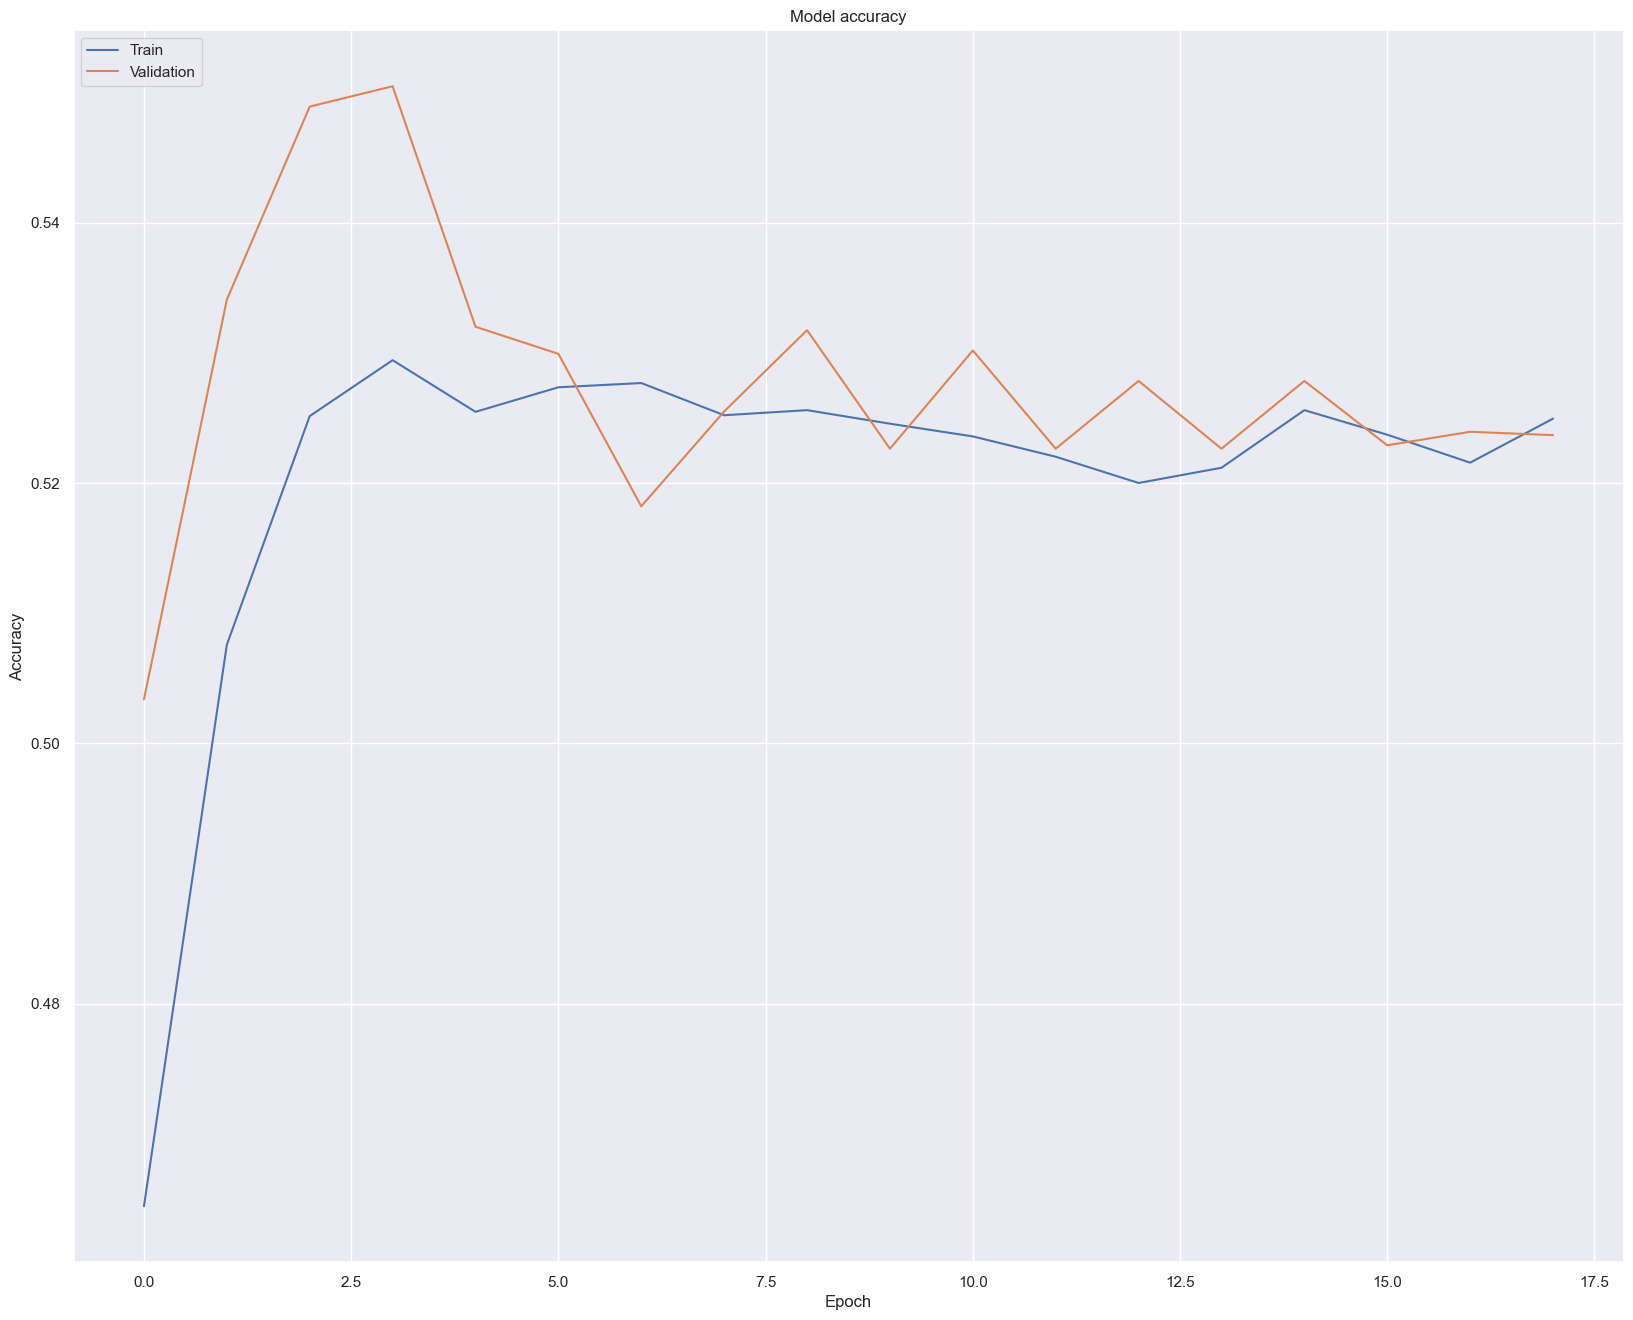

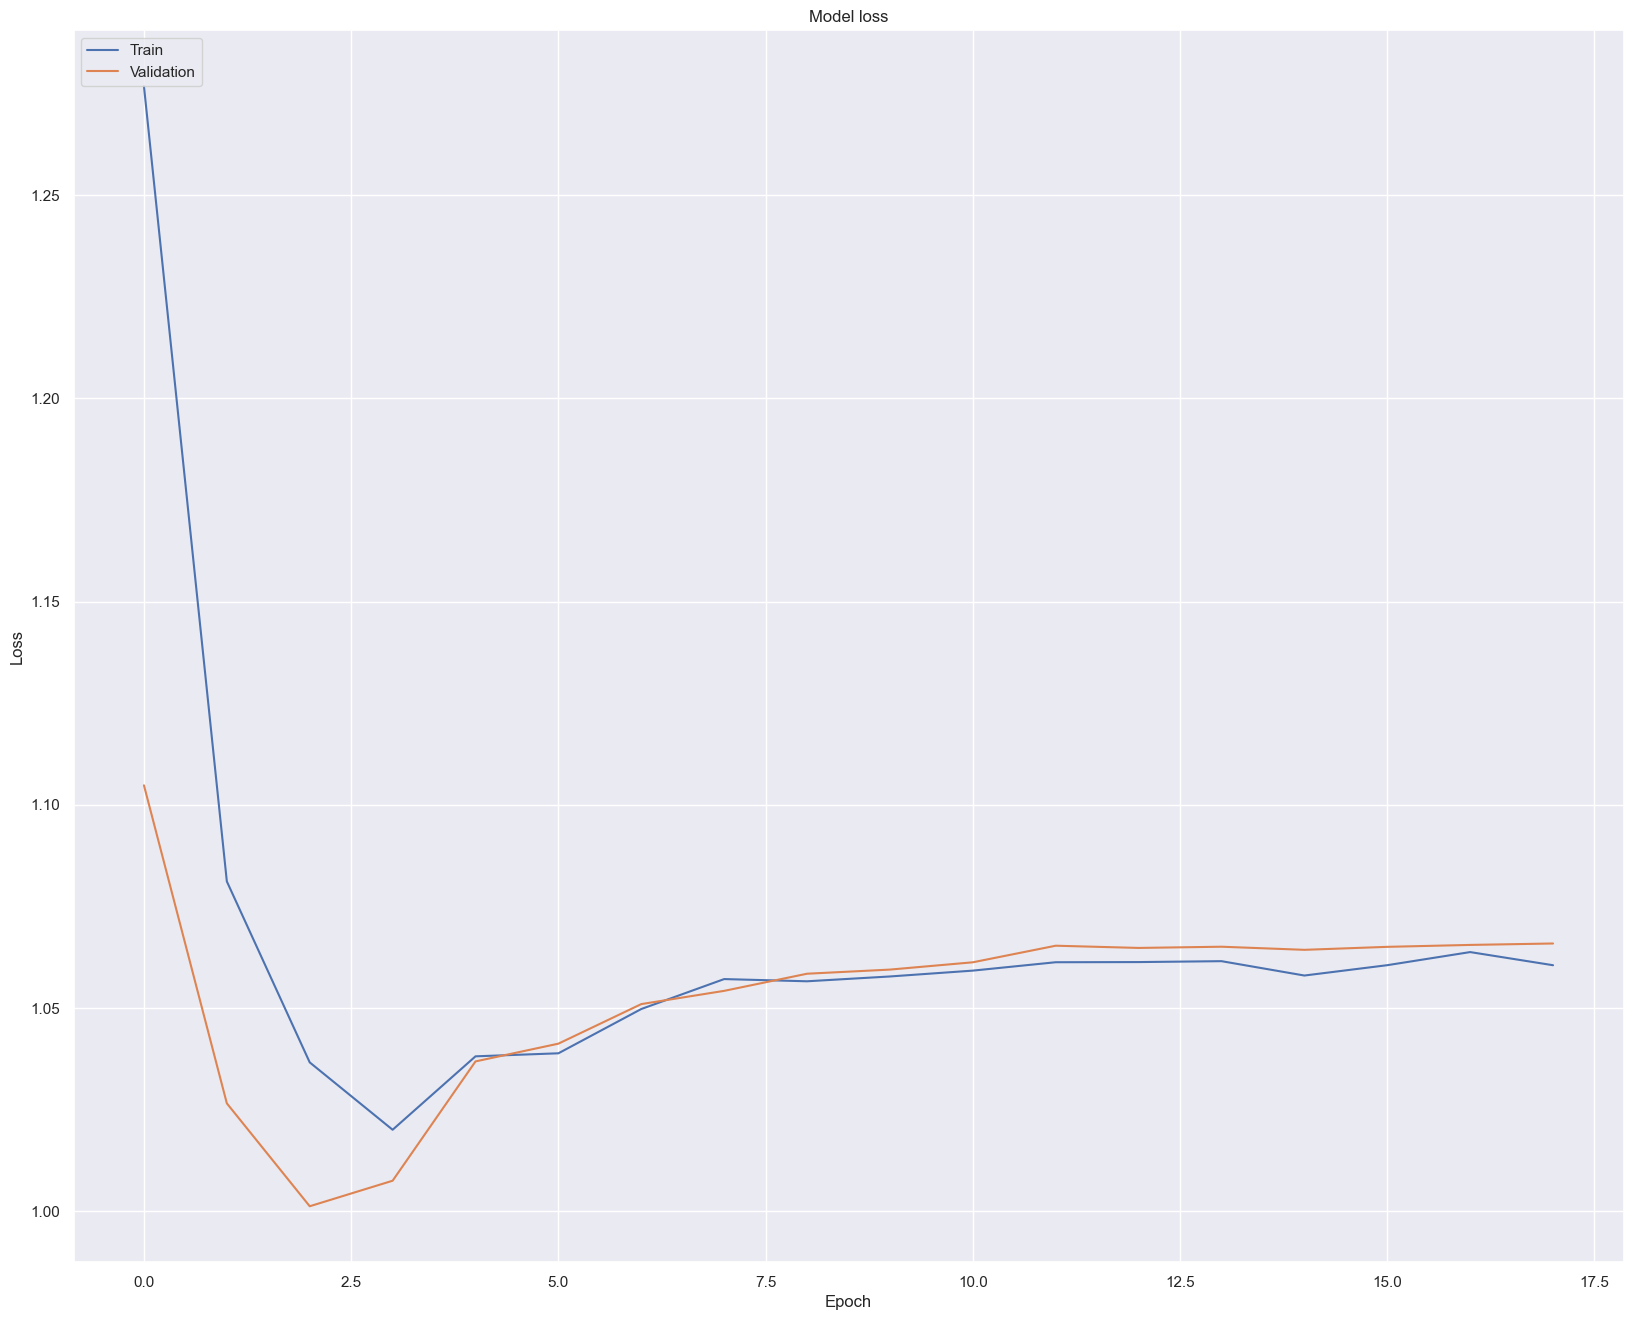

In [612]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [613]:
test = pd.read_csv("test.csv")

In [614]:
X_test = PCA_pipeline.transform(test)

In [615]:
id = test["id"]

In [616]:
predictions = model.predict(X_test)

401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [617]:
predictions

array([[0.2132253 , 0.02190928, 0.00641217, ..., 0.03894002, 0.27935168,
        0.43843782],
       [0.28234914, 0.05408185, 0.02562803, ..., 0.10335743, 0.14809076,
        0.3798755 ],
       [0.02221257, 0.03492205, 0.06021177, ..., 0.02000057, 0.2439757 ,
        0.5881178 ],
       ...,
       [0.00134406, 0.00558511, 0.9154459 , ..., 0.00816316, 0.00516108,
        0.05736205],
       [0.34621373, 0.03156983, 0.0177854 , ..., 0.08339081, 0.16866635,
        0.34823292],
       [0.00159141, 0.00272709, 0.9171445 , ..., 0.00638754, 0.00597991,
        0.06194106]], dtype=float32)

In [618]:
submission = pd.DataFrame(predictions)

In [621]:
submission.columns = ["Pastry",
            "Z_Scratch",
            "K_Scatch",
            "Stains",
            "Dirtiness",
            "Bumps",
            "Other_Faults"]

In [622]:
submission

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.213225,0.021909,0.006412,0.001724,0.038940,0.279352,0.438438
1,0.282349,0.054082,0.025628,0.006617,0.103357,0.148091,0.379876
2,0.022213,0.034922,0.060212,0.030560,0.020001,0.243976,0.588118
3,0.082860,0.026197,0.008629,0.007818,0.023093,0.393612,0.457791
4,0.056997,0.016842,0.008521,0.008111,0.015032,0.442247,0.452249
...,...,...,...,...,...,...,...
12809,0.236283,0.045318,0.006973,0.002750,0.060519,0.234703,0.413454
12810,0.193996,0.039868,0.048136,0.018540,0.075995,0.188441,0.435024
12811,0.001344,0.005585,0.915446,0.006939,0.008163,0.005161,0.057362
12812,0.346214,0.031570,0.017785,0.004141,0.083391,0.168666,0.348233


In [623]:
submission.insert(0, 'id', test["id"])

In [624]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.213225,0.021909,0.006412,0.001724,0.038940,0.279352,0.438438
1,19220,0.282349,0.054082,0.025628,0.006617,0.103357,0.148091,0.379876
2,19221,0.022213,0.034922,0.060212,0.030560,0.020001,0.243976,0.588118
3,19222,0.082860,0.026197,0.008629,0.007818,0.023093,0.393612,0.457791
4,19223,0.056997,0.016842,0.008521,0.008111,0.015032,0.442247,0.452249
...,...,...,...,...,...,...,...,...
12809,32028,0.236283,0.045318,0.006973,0.002750,0.060519,0.234703,0.413454
12810,32029,0.193996,0.039868,0.048136,0.018540,0.075995,0.188441,0.435024
12811,32030,0.001344,0.005585,0.915446,0.006939,0.008163,0.005161,0.057362
12812,32031,0.346214,0.031570,0.017785,0.004141,0.083391,0.168666,0.348233


In [625]:
submission.to_csv("submission.csv",index=False,)